# Sequence Associated Features

# AdaBoostClassifier

In [7]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sys import *

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

ada= AdaBoostClassifier(n_estimators=88, learning_rate=0.641, random_state=0)
ada.fit(data_train, target_train)

Pred_labels = ada.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
rms= sqrt(mean_squared_error(target_test,Pred_labels.round()))
print(rms)
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14584    21]
 [   27   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.84      0.80      0.82       134

    accuracy                           1.00     14739
   macro avg       0.92      0.90      0.91     14739
weighted avg       1.00      1.00      1.00     14739

0.8151518271038123
No Skill PR AUC: 0.818
Logistic ROC AUC 0.899
SpearmanrResult(correlation=0.8153695142581562, pvalue=0.0)
0.003256665988194586
0.003256665988194586
0.057067205890901876
0.6385044990725932
0.6385228939179488


In [21]:
import shap
data_for_prediction = shap.sample(data_test, 200)
#data_for_prediction = data_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
#data_for_prediction.head()
#data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
#n1=model.predict_proba(data_for_prediction_array)
#n1=model1.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 200)
#data_for_prediction=np.asarray(data_for_prediction)
#data_for_prediction1=np.asarray(data_for_prediction1)
#explainer1 = shap.Explainer(model1.predict_proba, data_test)
#shap_values = explainer1(data_train)
k_explainer = shap.KernelExplainer(mlp.predict_proba, data_for_prediction)
k_shap_values = k_explainer.shap_values(data_for_prediction1, l1_reg="num_features(600)")

#explainer = shap.Explainer(model, data_train.loc[:50,:], feature_names=data_train.columns)
#shap_values = explainer(data_test.loc[:50,:])


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

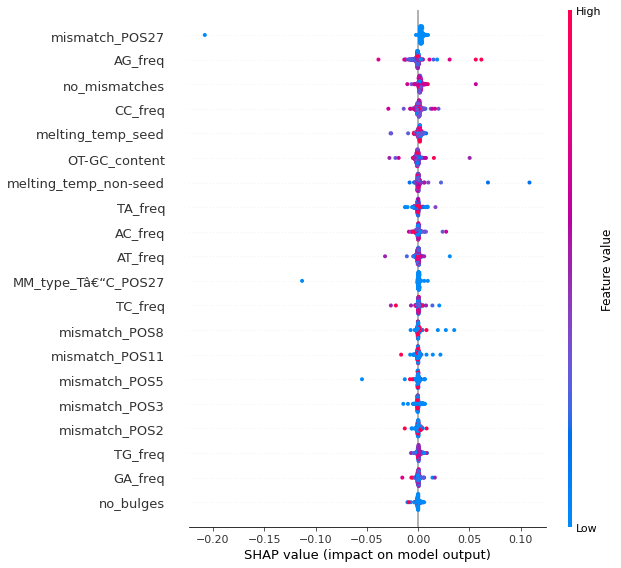

In [22]:
shap.summary_plot(k_shap_values[0], data_for_prediction, max_display=20)


# LinearSVC

In [5]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sys import *
from sklearn.svm import LinearSVC
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

svc=LinearSVC(C=0.02, loss='squared_hinge', penalty='l2', dual=False, tol=0.0001, class_weight={0:0.12, 1:0.7})
svc.fit(data_train, target_train)

Pred_labels = svc.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14557    48]
 [   25   109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.69      0.81      0.75       134

    accuracy                           1.00     14739
   macro avg       0.85      0.91      0.87     14739
weighted avg       1.00      1.00      1.00     14739

0.7466555591476565
No Skill PR AUC: 0.755
Logistic ROC AUC 0.905
SpearmanrResult(correlation=0.7490455948560197, pvalue=0.0)
0.004952846190379266
0.004952846190379266
0.07037646048487567
0.4502255923395687
0.4504958943727101


# MLPCLassifier

In [16]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sys import *

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

mlp= MLPClassifier(solver='adam', alpha=0.0006, activation= 'relu', hidden_layer_sizes=[10,10,10], max_iter=500, learning_rate_init=0.0003, random_state=6, tol=0.00002, learning_rate='adaptive', n_iter_no_change=20, validation_fraction=0.25, verbose=True)
mlp.fit(data_train, target_train)

Pred_labels = mlp.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
Iteration 1, loss = 0.21395034
Iteration 2, loss = 0.03788173
Iteration 3, loss = 0.03206342
Iteration 4, loss = 0.02791139
Iteration 5, loss = 0.02471459
Iteration 6, loss = 0.02190483
Iteration 7, loss = 0.01932214
Iteration 8, loss = 0.01719505
Iteration 9, loss = 0.01551946
Iteration 10, loss = 0.01405339
Iteration 11, loss = 0.01332802
Iteration 12, loss = 0.01231420
Iteration 13, loss = 0.01160176
Iteration 14, loss = 0.01113310
Iteration 15, loss = 0.01063210
Iteration 16, loss = 0.01016732
Iteration 17, loss = 0.01007936
Iteration 18, loss = 0.00970176
Iteration 19, loss = 0.00970251
Iteration 20, loss = 0.00921236
Iteration 21, loss = 0.00897783
Iteration 22, loss = 0.00875352
Iteration 23, loss = 0.00899504
Iteration 24, loss = 0.00849585
Iteration 25, loss = 0.00847887
Iteration 26, loss = 0.00821897
Iteration 27, loss = 0.00816235
Iteration 28, loss = 0.00809190
Iteration 29, loss = 0.00836407
Iteration 30, loss = 0.00807827
Iteration 31, loss = 0.00839

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

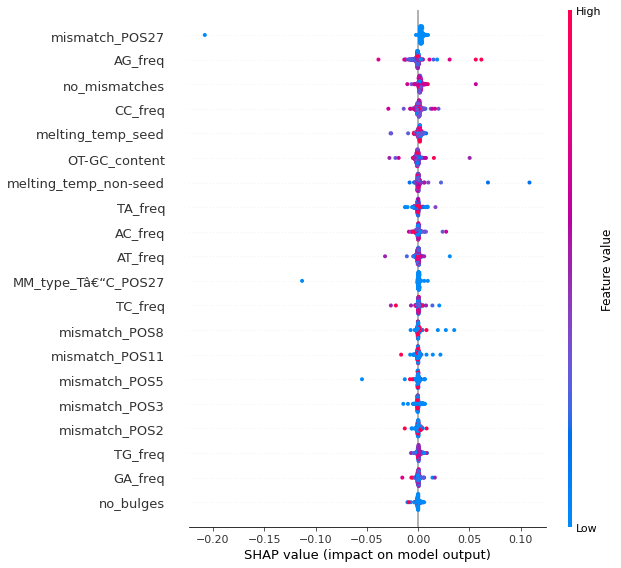

# DecisionTreeClassifier

In [8]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sys import *

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

dtc= DecisionTreeClassifier(class_weight={0:0.25, 1:1},max_features=239, max_depth=1000, ccp_alpha=1e-10, random_state=0)
dtc.fit(data_train, target_train)

Pred_labels = dtc.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14539    66]
 [   22   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.63      0.84      0.72       134

    accuracy                           0.99     14739
   macro avg       0.81      0.92      0.86     14739
weighted avg       1.00      0.99      0.99     14739

0.7149921421514684
No Skill PR AUC: 0.733
Logistic ROC AUC 0.916
SpearmanrResult(correlation=0.7223644227449092, pvalue=0.0)
0.005970554311690074
0.005970554311690074
0.0772693620504924
0.33725824829975415
0.3382474822055418


# LogisticRegression

In [7]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sys import *

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

lg1=LogisticRegression(class_weight={0:0.5, 1:2}, C=1, max_iter=300, solver='newton-cg')
lg1.fit(data_train, target_train)

Pred_labels = lg1.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14544    61]
 [   19   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.65      0.86      0.74       134

    accuracy                           0.99     14739
   macro avg       0.83      0.93      0.87     14739
weighted avg       1.00      0.99      0.99     14739

0.739243622512728
No Skill PR AUC: 0.756
Logistic ROC AUC 0.927
SpearmanrResult(correlation=0.74626954602008, pvalue=0.0)
0.005427776646990976
0.005427776646990976
0.07367344601001759
0.3975074984543219
0.3984088458767443


# Mismatch energy associated features

# AdaBoostClassifier

In [13]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpf1/AsCpf1_Dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
#fs_selector = VarianceThreshold(0.000019)
#data=sfs.transform(data)
#data = fs_selector.fit_transform(data, target)
data_train1, data_test1, target_train1, target_test1 = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=27, learning_rate=0.98, random_state=16)
clf.fit(data_train1, target_train1)

Pred_labels4 = clf.predict(data_test1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test1,Pred_labels4))
print(classification_report(target_test1,Pred_labels4))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test1,Pred_labels4))
precision, recall, _ = precision_recall_curve(target_test1,Pred_labels4)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test1,Pred_labels4)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test1,Pred_labels4.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test1,Pred_labels4.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test1,Pred_labels4.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test1,Pred_labels4.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test1,Pred_labels4.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test1,Pred_labels4.round()))

off-target' :  [0 1]
[[14599    10]
 [   28   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.91      0.78      0.84       130

    accuracy                           1.00     14739
   macro avg       0.95      0.89      0.92     14739
weighted avg       1.00      1.00      1.00     14739

0.8416826892363948
No Skill PR AUC: 0.849
Logistic ROC AUC 0.892
SpearmanrResult(correlation=0.8440594724555427, pvalue=0.0)
0.0025781939073207137
0.0025781939073207137
0.05077591857682846
0.7050911714064564
0.7052617722478767


In [12]:
import shap
data_for_prediction = shap.sample(data_test, 200)
#data_for_prediction = data_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
#data_for_prediction.head()
#data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
#n1=model.predict_proba(data_for_prediction_array)
#n1=model1.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 200)
#data_for_prediction=np.asarray(data_for_prediction)
#data_for_prediction1=np.asarray(data_for_prediction1)
#explainer1 = shap.Explainer(model1.predict_proba, data_test)
#shap_values = explainer1(data_train)
k_explainer = shap.KernelExplainer(clf.predict_proba, data_for_prediction)
k_shap_values = k_explainer.shap_values(data_for_prediction1, l1_reg="num_features(600)")

#explainer = shap.Explainer(model, data_train.loc[:50,:], feature_names=data_train.columns)
#shap_values = explainer(data_test.loc[:50,:])


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

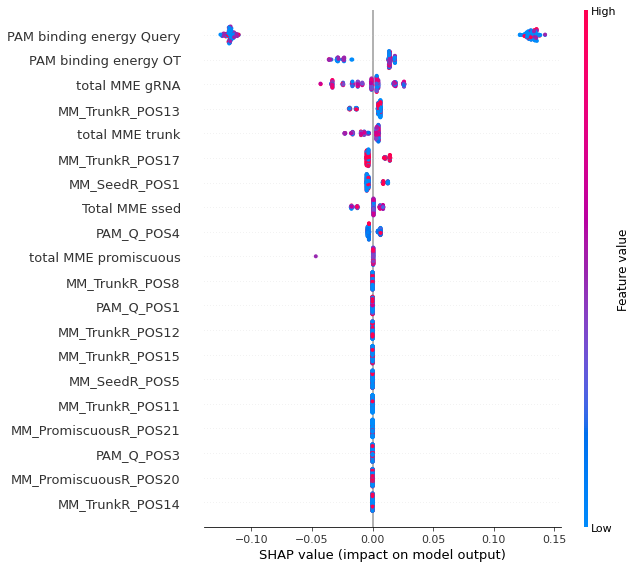

In [13]:
shap.summary_plot(k_shap_values[0], data_for_prediction, max_display=20)

# LnearSVC

In [2]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
np.random.seed(235)
from sklearn.svm import SVC
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpf1/AsCpf1_Dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
#fs_selector = VarianceThreshold(0.000019)
#data=sfs.transform(data)
#data = fs_selector.fit_transform(data, target)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
svc=LinearSVC(C=0.02, loss='squared_hinge', penalty='l2', dual=False, tol=0.0001, class_weight={0:0.12, 1:0.7})
svc.fit(data_train, target_train)
Pred_labels3 = svc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels3))
print(classification_report(target_test,Pred_labels3))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels3))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels3)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels3)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels3.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels3.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels3.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels3.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels3.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels3.round()))

off-target' :  [0 1]
[[14583    26]
 [   43    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.77      0.67      0.72       130

    accuracy                           1.00     14739
   macro avg       0.88      0.83      0.86     14739
weighted avg       1.00      1.00      1.00     14739

0.713700844857422
No Skill PR AUC: 0.721
Logistic ROC AUC 0.834
SpearmanrResult(correlation=0.7154830198791097, pvalue=0.0)
0.004681457358029717
0.004681457358029717
0.06842117623974113
0.46450765334330235
0.46465982508148274


# Decision tree Classifier

In [4]:
import warnings  
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpf1/AsCpf1_Dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
#fs_selector = VarianceThreshold(0.000019)
#data=sfs.transform(data)
#data = fs_selector.fit_transform(data, target)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
from sklearn.ensemble import AdaBoostClassifier
clf = DecisionTreeClassifier(class_weight={0:1, 1:4}, max_features=23, min_samples_leaf=15, max_depth=5, ccp_alpha=1e-4, random_state=38)
clf.fit(data_train, target_train)
Pred_labels = clf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels))
print(classification_report(target_test,Pred_labels))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14603     6]
 [   33    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.94      0.75      0.83       130

    accuracy                           1.00     14739
   macro avg       0.97      0.87      0.92     14739
weighted avg       1.00      1.00      1.00     14739

0.8313025124383439
No Skill PR AUC: 0.845
Logistic ROC AUC 0.873
SpearmanrResult(correlation=0.8370306772389361, pvalue=0.0)
0.002646041115408101
0.002646041115408101
0.051439684246776834
0.6973304127592579
0.6977142646524533


# MLPClassifier

In [7]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpf1/AsCpf1_Dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
#fs_selector = VarianceThreshold(0.000019)
#data=sfs.transform(data)
#data = fs_selector.fit_transform(data, target)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
from sklearn.ensemble import AdaBoostClassifier
clf = MLPClassifier(solver='adam', alpha=0.0002, activation= 'relu', hidden_layer_sizes=[32, 57, 39], learning_rate_init=0.001, random_state=6, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=False)
clf.fit(data_train, target_train)
Pred_labels1 = clf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels1))
print(classification_report(target_test,Pred_labels1))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels1))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels1)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels1)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels1.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels1.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels1.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels1.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels1.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels1.round()))

off-target' :  [0 1]
[[14604     5]
 [   36    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.95      0.72      0.82       130

    accuracy                           1.00     14739
   macro avg       0.97      0.86      0.91     14739
weighted avg       1.00      1.00      1.00     14739

0.8195848264706488
No Skill PR AUC: 0.838
Logistic ROC AUC 0.861
SpearmanrResult(correlation=0.8273183794529388, pvalue=0.0)
0.0027817355315828754
0.0027817355315828754
0.05274216085431915
0.6818088954648609
0.6823149059852461


# Logistic Regression

In [8]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpf1/AsCpf1_Dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
#fs_selector = VarianceThreshold(0.000019)
#data=sfs.transform(data)
#data = fs_selector.fit_transform(data, target)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
from sklearn.ensemble import AdaBoostClassifier
clf = LogisticRegression(class_weight={0:0.5, 1:2}, C=10, max_iter=100, solver='newton-cg')
clf.fit(data_train, target_train)
Pred_labels2 = clf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels2))
print(classification_report(target_test,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels2.round()))

off-target' :  [0 1]
[[14589    20]
 [   32    98]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.83      0.75      0.79       130

    accuracy                           1.00     14739
   macro avg       0.91      0.88      0.89     14739
weighted avg       1.00      1.00      1.00     14739

0.7885477868957389
No Skill PR AUC: 0.793
Logistic ROC AUC 0.876
SpearmanrResult(correlation=0.7894882780660472, pvalue=0.0)
0.0035280548205441345
0.0035280548205441345
0.05939743109381192
0.5964405503456771
0.5965163729418639


# Sequence and mismatch energy associated features

# MLPClassifier

In [1]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
data_train2, data_test2, target_train2, target_test2 = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
clf2 = MLPClassifier(solver='adam', alpha=0.0002, activation= 'relu', hidden_layer_sizes=[10, 10, 10, 21, 13], learning_rate_init=0.001, random_state=52, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=False)
#MLPClassifier(solver='adam', alpha=0.002, activation= 'relu', hidden_layer_sizes=[150, 128, 109], learning_rate_init=0.0001, random_state=52, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=False)
#5-21, 6-13
clf2.fit(data_train2, target_train2)

Pred_labels2 = clf2.predict(data_test2)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test2,Pred_labels2))
print(classification_report(target_test2,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test2,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test2,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test2,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test2,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test2,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test2,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test2,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test2,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test2,Pred_labels2.round())) 

off-target' :  [0 1]
[[14588    21]
 [   22   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.84      0.83      0.83       130

    accuracy                           1.00     14739
   macro avg       0.92      0.91      0.92     14739
weighted avg       1.00      1.00      1.00     14739

0.8325052109472308
No Skill PR AUC: 0.835
Logistic ROC AUC 0.915
SpearmanrResult(correlation=0.832511526735995, pvalue=0.0)
0.0029174299477576497
0.0029174299477576497
0.0540132386342242
0.6662873781704638
0.6662879047162706


In [2]:
import shap
data_for_prediction = shap.sample(data_test2, 200)
#data_for_prediction = data_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
#data_for_prediction.head()
#data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
#n1=model.predict_proba(data_for_prediction_array)
#n1=model1.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train2, 200)
#data_for_prediction=np.asarray(data_for_prediction)
#data_for_prediction1=np.asarray(data_for_prediction1)
#explainer1 = shap.Explainer(model1.predict_proba, data_test)
#shap_values = explainer1(data_train)
k_explainer = shap.KernelExplainer(clf2.predict_proba, data_for_prediction)
k_shap_values = k_explainer.shap_values(data_for_prediction1, l1_reg="num_features(600)")

#explainer = shap.Explainer(model, data_train.loc[:50,:], feature_names=data_train.columns)
#shap_values = explainer(data_test.loc[:50,:])


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

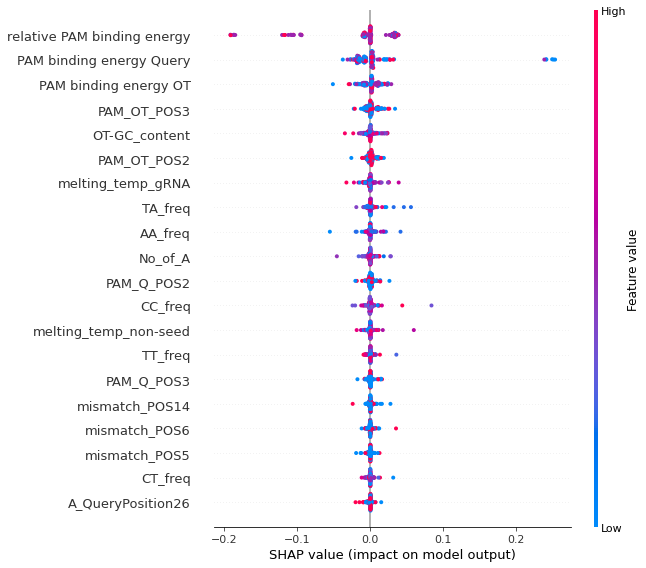

In [3]:
shap.summary_plot(k_shap_values[0], data_for_prediction, max_display=20)

# DecisionTreeClassifier

In [21]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
clf = DecisionTreeClassifier(class_weight={0:1, 1:9}, max_features=20, min_samples_leaf=9, max_depth=14, ccp_alpha=1e-6)
#24
clf.fit(data_train, target_train)
Pred_labels2 = clf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels2))
print(classification_report(target_test,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels2.round())) 

off-target' :  [0 1]
[[14437   172]
 [   41    89]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14609
           1       0.34      0.68      0.46       130

    accuracy                           0.99     14739
   macro avg       0.67      0.84      0.72     14739
weighted avg       0.99      0.99      0.99     14739

0.4487518983461014
No Skill PR AUC: 0.514
Logistic ROC AUC 0.836
SpearmanrResult(correlation=0.4770021735727834, pvalue=0.0)
0.014451455322613474
0.014451455322613474
0.12021420599335784
-0.6530415918532839
-0.6440055392618889


# LOgisticRegression

In [1]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
lg1=LogisticRegression(class_weight={0:1.3, 1:2.3}, C=5, solver='newton-cg')
lg1.fit(data_train, target_train)
Pred_labels2 = lg1.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels2))
print(classification_report(target_test,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels2.round())) 

off-target' :  [0 1]
[[14589    20]
 [   36    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.82      0.72      0.77       130

    accuracy                           1.00     14739
   macro avg       0.91      0.86      0.88     14739
weighted avg       1.00      1.00      1.00     14739

0.7685845308068353
No Skill PR AUC: 0.775
Logistic ROC AUC 0.861
SpearmanrResult(correlation=0.7702700633315209, pvalue=0.0)
0.0037994436528936836
0.0037994436528936836
0.0616396272935981
0.5653975157568831
0.5655323114834372


c:\users\pragy\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


# LInearSVC

In [2]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.under_sampling import NearMiss
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
svc=LinearSVC(C=0.01, loss='squared_hinge', penalty='l2', dual=False, tol=0.0001, class_weight={0:0.26, 1:0.7})
svc.fit(data_train, target_train)
Pred_labels2 = svc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels2))
print(classification_report(target_test,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels2.round())) 

off-target' :  [0 1]
[[14600     9]
 [   37    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.91      0.72      0.80       130

    accuracy                           1.00     14739
   macro avg       0.95      0.86      0.90     14739
weighted avg       1.00      1.00      1.00     14739

0.8001743626743627
No Skill PR AUC: 0.815
Logistic ROC AUC 0.857
SpearmanrResult(correlation=0.8061599854361692, pvalue=0.0)
0.0031209715720198115
0.0031209715720198115
0.055865656462802005
0.6430051022288683
0.6434179141414405


# AdaBoostClassifer

In [4]:
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)
class_names=np.array(['0','1'])
clf = AdaBoostClassifier(n_estimators=90, learning_rate=0.79, random_state=16)
clf.fit(data_train, target_train)
Pred_labels2 = clf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels2))
print(classification_report(target_test,Pred_labels2))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels2))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels2)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels2)
print('Logistic ROC AUC %.3f' % roc_auc)  
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test,Pred_labels2.round()))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_test,Pred_labels2.round()))
from math import sqrt
print(sqrt(mean_squared_error(target_test,Pred_labels2.round())))
from sklearn.metrics import r2_score
print(r2_score(target_test,Pred_labels2.round()))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(target_test,Pred_labels2.round())) 

off-target' :  [0 1]
[[14596    13]
 [   37    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14609
           1       0.88      0.72      0.79       130

    accuracy                           1.00     14739
   macro avg       0.94      0.86      0.89     14739
weighted avg       1.00      1.00      1.00     14739

0.7864435483029659
No Skill PR AUC: 0.798
Logistic ROC AUC 0.857
SpearmanrResult(correlation=0.7906082567016591, pvalue=0.0)
0.00339236040436936
0.00339236040436936
0.05824397311627496
0.6119620676400742
0.6122653580248211


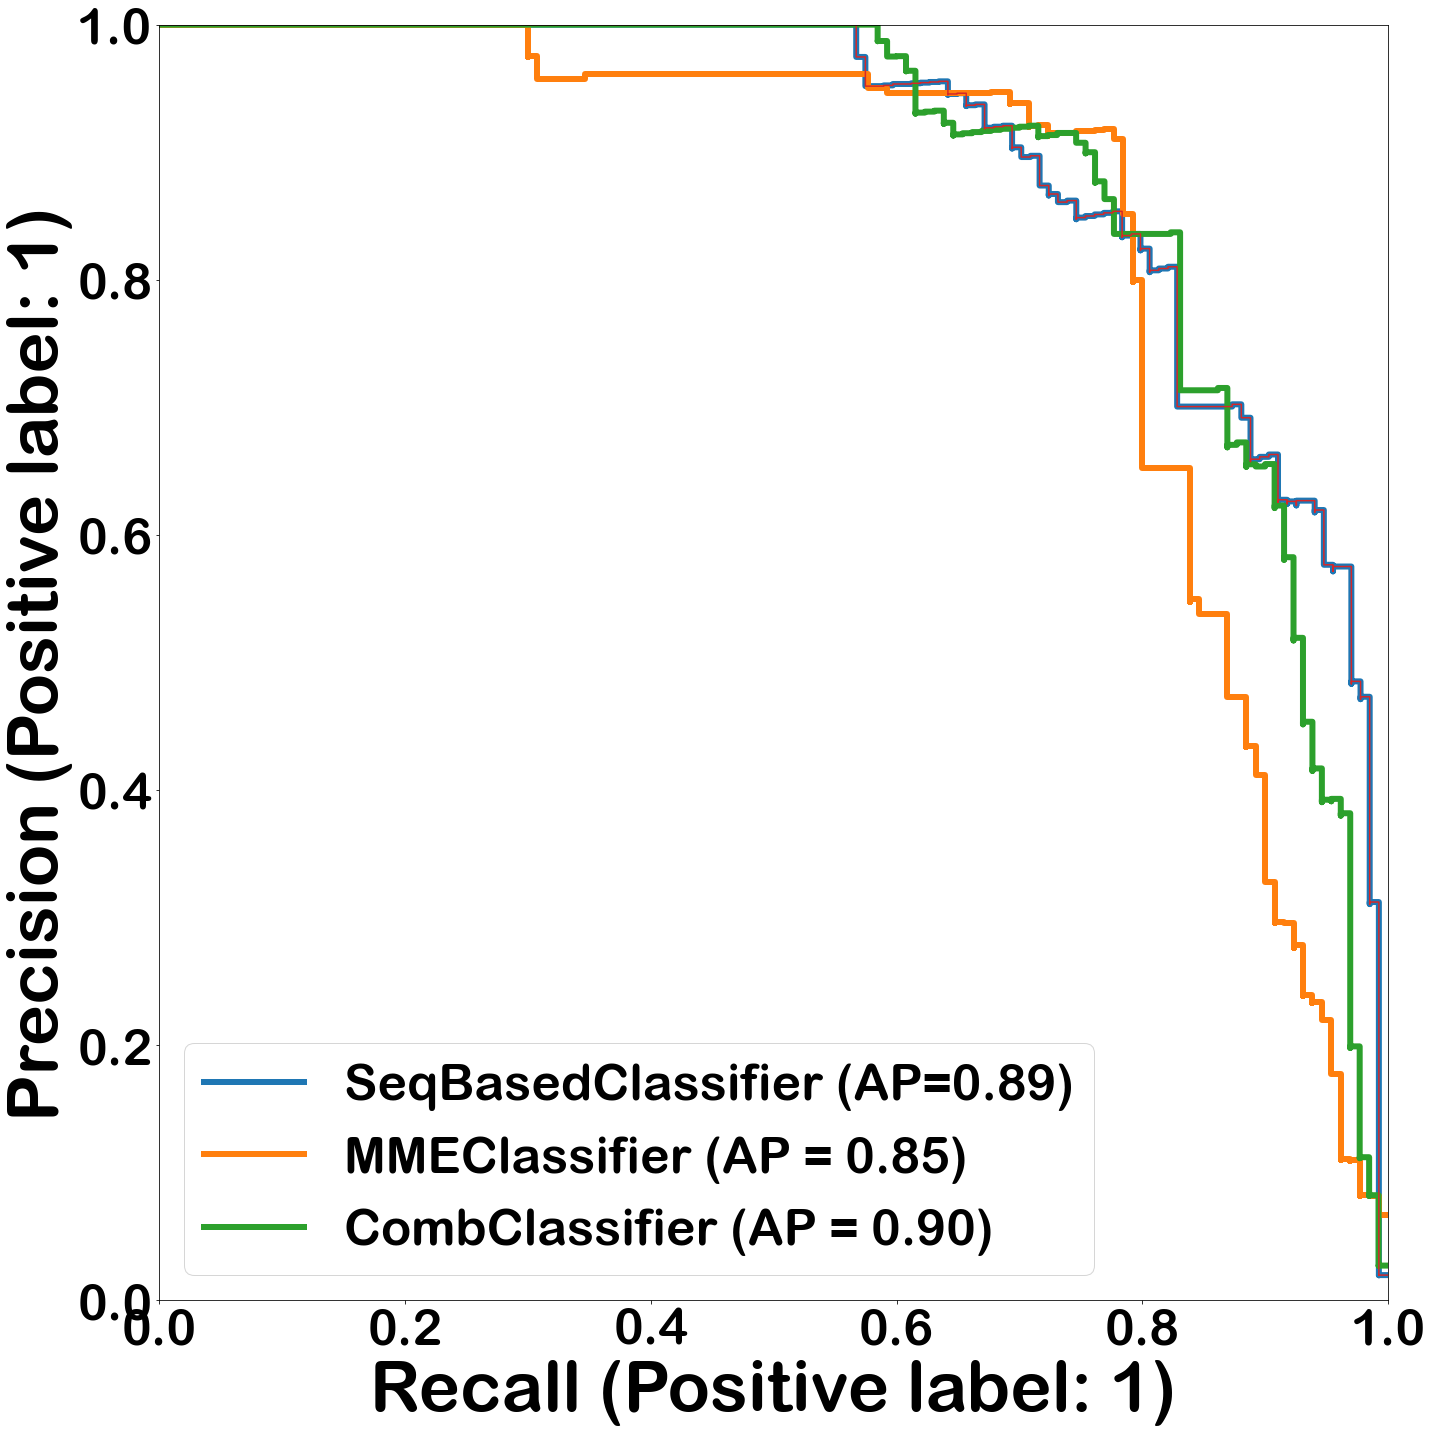

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import matplotlib.font_manager as font_manager

fig, ax = plt.subplots(figsize=(20, 20))

#plt.legend(["RandomFOrestClassifier (AP=0.89)", "LinearSVC (AP=0.89)", "LogistivRegression (Ap=0.89)", "DecisionTreeClassifer (Ap-0.69)", "AdaboostClassifier (Ap=0.90)", "MLPClassifier (Ap=0.87)"], prop={"size":25, "family":'Arial Rounded MT Bold'})

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('Predicted label', font="Arial Rounded MT Bold", fontsize=70)
plt.ylabel('True label', font="Arial Rounded MT Bold", fontsize=70)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
scv1=plot_precision_recall_curve(ada, data_test, target_test, linewidth = 6, ax=ax) 
scv2=plot_precision_recall_curve(clf, data_test1, target_test1, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(clf2, data_test2, target_test2, linewidth = 6, ax=ax)

scv1.plot(ax=ax)
font = font_manager.FontProperties(family='Arial Rounded MT Bold', size=50)
#ax.legend(prop=font)
ax.legend(["SeqBasedClassifier (AP=0.89)", "MMEClassifier (AP = 0.85)", "CombClassifier (AP = 0.90)"], prop={"size":50, "family":'Arial Rounded MT Bold'}, loc="lower left")
#plt.title('Normalized Confusion Matrix \n', font="Arial Rounded MT Bold", fontsize=18)
#plt.show()
plt.tight_layout()
plt.savefig("D://PhD_related/manuscript_obj1/update_images/Precision-Recall_AsCpf1-saved2.png", dpi=1500)

off-target' :  [0 1]
Train: [    0     1     2 ... 58950 58951 58952] Validation: [    9    10    11 ... 58946 58953 58954]
Train: [    1     2     3 ... 58952 58953 58954] Validation: [    0    17    21 ... 58942 58944 58950]
Train: [    0     1     3 ... 58952 58953 58954] Validation: [    2     7    28 ... 58940 58943 58948]
Train: [    0     1     2 ... 58952 58953 58954] Validation: [    3     5     6 ... 58933 58935 58939]
Train: [    0     2     3 ... 58950 58953 58954] Validation: [    1     4    12 ... 58949 58951 58952]


<ipython-input-15-bee6eeaad842>:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


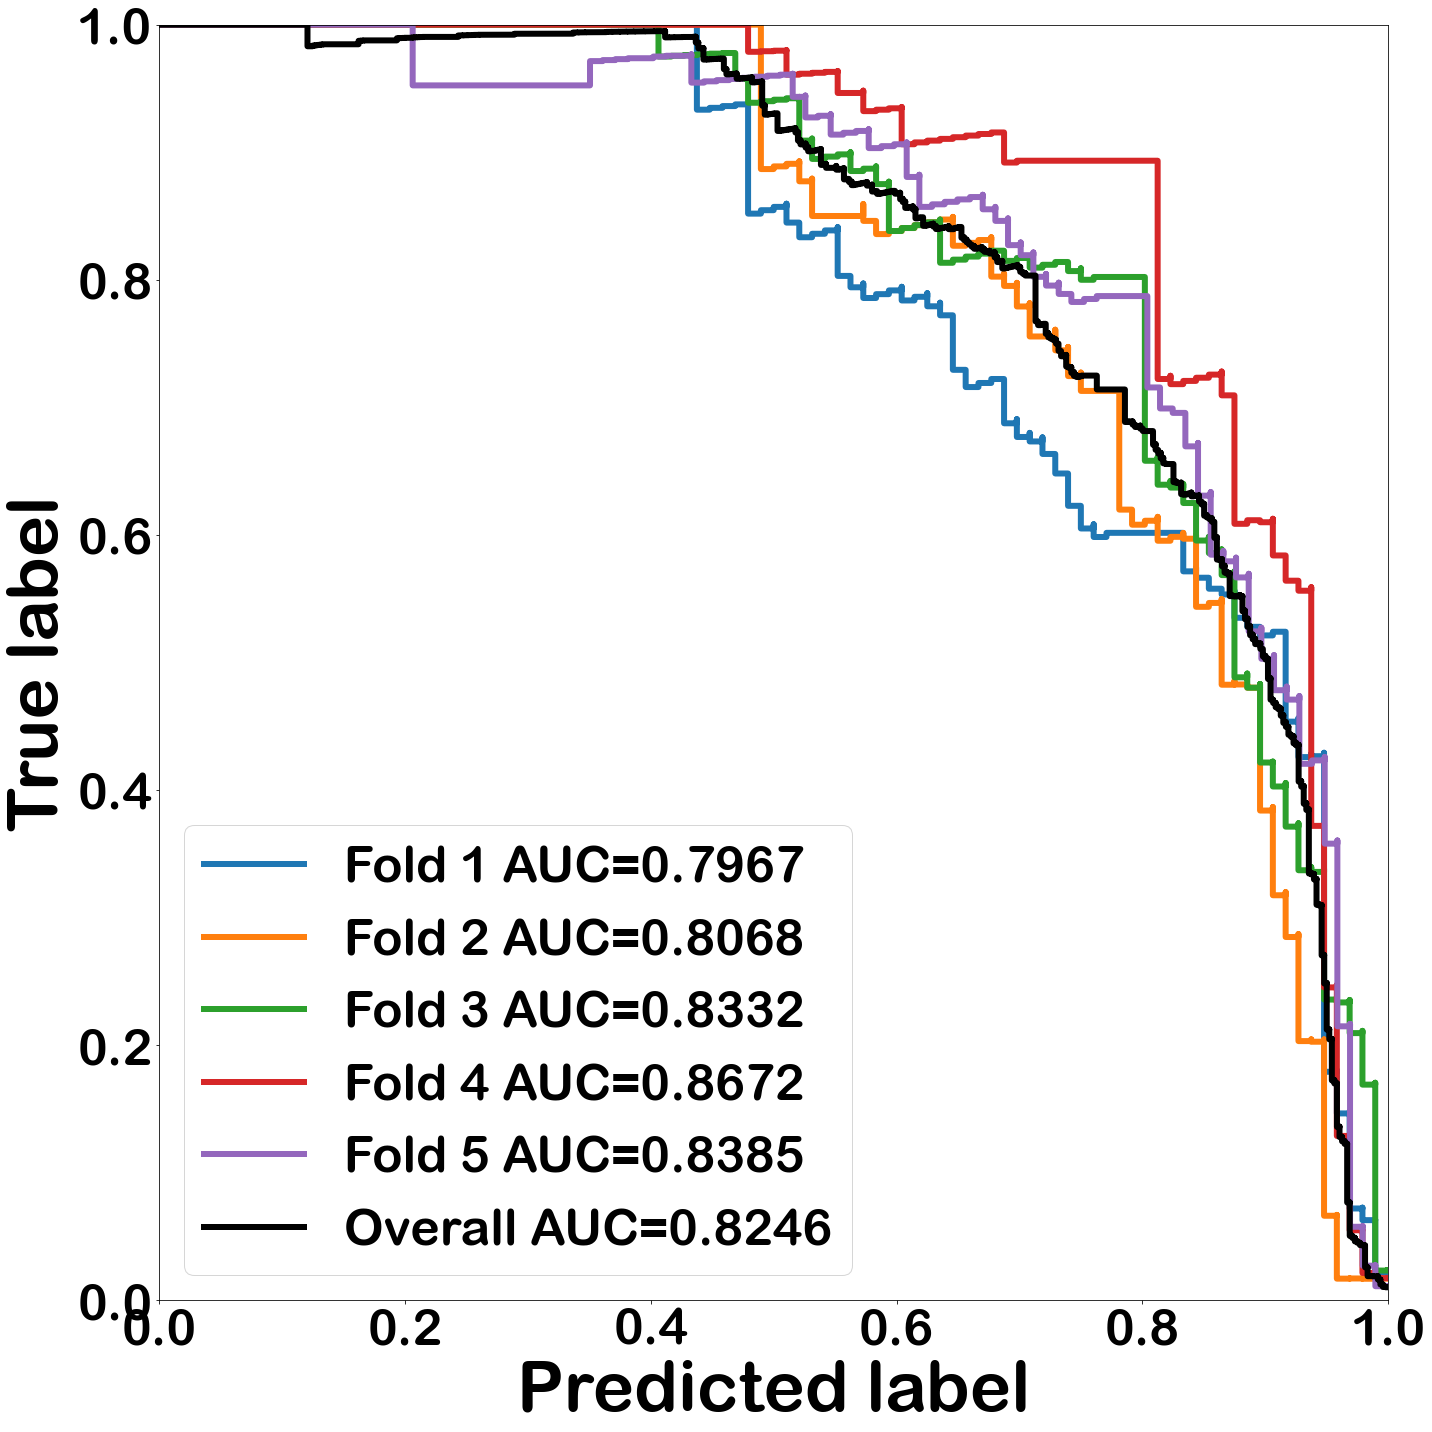

In [15]:
from sklearn.metrics import roc_curve
from numpy import interp
import warnings  
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.font_manager as font_manager
import numpy as np
np.random.seed(235)
OT_data=pd.read_csv(r"D://PhD_related/obj1_MM/mismatch_energy_AsCpF1/AsCpf1_Dataset_MM-Seq_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
cols = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[cols]
data=np.asarray(data)
target = OT_data['Y']
target=np.asarray(target)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=53)
#rs-9
i=0
f, axes = plt.subplots(figsize=(20,20))
'''axes[0].scatter(data[target==0,0], data[target==0,1], color='blue', s=2, label='y=0')
axes[0].scatter(data[target!=0,0], data[target!=0,1], color='red', s=2, label='y=1')
axes[0].set_xlabel('data[:,0]')
axes[0].set_ylabel('data[:,1]')
axes[0].legend(loc='lower left', fontsize='small')'''
y_real = []
y_proba = []
for train_index, val_index in skf.split(data, target): 
    i=i+1
    print("Train:", train_index, "Validation:", val_index) 
    data_train, data_test = data[train_index], data[val_index] 
    target_train, target_test = target[train_index], target[val_index]
    clf = MLPClassifier(solver='adam', alpha=0.0002, activation= 'relu', hidden_layer_sizes=[10, 10, 10, 21, 13], learning_rate_init=0.001, random_state=52, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=False)
    clf.fit(data_train, target_train)
    pred_proba=clf.predict_proba(data_test)
    precision, recall, _ = precision_recall_curve(target_test, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i, auc(recall, precision))
    axes.step(recall, precision, label=lab, lw=6)
    y_real.append(target_test)
    y_proba.append(pred_proba[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes.step(recall, precision, label=lab, lw=6, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(loc='lower left', fontsize='small')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('Predicted label', font="Arial Rounded MT Bold", fontsize=70)
plt.ylabel('True label', font="Arial Rounded MT Bold", fontsize=70)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
f.tight_layout()
#f.savefig('result.png')
font = font_manager.FontProperties(family='Arial Rounded MT Bold', size=50)
#ax.legend(prop=font)
axes.legend(["Fold 1 AUC=0.7967", "Fold 2 AUC=0.8068", "Fold 3 AUC=0.8332", "Fold 4 AUC=0.8672", "Fold 5 AUC=0.8385", "Overall AUC=0.8246"], prop={"size":50, "family":'Arial Rounded MT Bold'}, loc="lower left")
#plt.title('Normalized Confusion Matrix \n', font="Arial Rounded MT Bold", fontsize=18)
f.show()
plt.savefig("D://PhD_related/manuscript_obj1/update_images/5-foldCV_AsCpf1-saved.png", dpi=1500)